In [1]:
import numpy as np
import os
from sklearn.metrics import confusion_matrix
import seaborn as sn; sn.set(font_scale=1.4)
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tqdm import tqdm

class_names = ['5', '4', '3', '2', '1']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}
nb_classes = len(class_names)
IMAGE_SIZE = (150,150)
print(nb_classes)

C:\Users\znzna\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\znzna\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\znzna\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\znzna\Anaconda3\envs\tensorflow\lib\site-packages

5


C:\Users\znzna\Anaconda3\envs\tensorflow\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\znzna\Anaconda3\envs\tensorflow\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\znzna\Anaconda3\envs\tensorflow\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\znzna\Anaconda3\envs\tensorf

In [2]:
def load_data():
    datasets = ['ex_train', 'ex_test']
    output = []
    for dataset in datasets :
        images = []
        labels = []
        print("Loading {}".format(dataset))
        for folder in os.listdir(dataset):
            label = class_names_label[folder]
            for file in tqdm(os.listdir(os.path.join(dataset, folder))) :
                img_path = os.path.join(os.path.join(dataset, folder), file)
                image = cv2.imread(img_path)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = cv2.resize(image, IMAGE_SIZE)
                images.append(image)
                labels.append(label)
        images = np.array(images, dtype = 'float32')
        labels = np.array(labels, dtype = 'int32')
        output.append((images,labels))
    return output

In [3]:
(train_images, train_labels), (test_images, test_labels) = load_data()

  2%|█▉                                                                             | 95/3808 [00:00<00:03, 944.69it/s]

Loading ex_train


  8%|██████                                                                         | 97/1272 [00:00<00:01, 969.27it/s]

Loading ex_test


100%|██████████████████████████████████████████████████████████████████████████████| 678/678 [00:00<00:00, 1419.08it/s]


In [4]:
train_images, train_labels = shuffle(train_images, train_labels, random_state=25)

In [5]:
import pandas as pd

_, train_counts = np.unique(train_labels, return_counts=True)
_, test_counts = np.unique(test_labels, return_counts=True)
pd.DataFrame({'train':train_counts,'test':test_counts}, index=class_names).plot.bar()

In [6]:
train_images= train_images/ 255.0
test_images = test_images/ 255.0

In [7]:
from tensorflow import keras

In [8]:
model = tf.keras.Sequential([tf.keras.layers.Conv2D(32,(3,3), activation = 'relu', input_shape = (150,150,3)), tf.keras.layers.MaxPooling2D(2,2), tf.keras.layers.Conv2D(32, (3,3), activation = 'relu'), tf.keras.layers.MaxPooling2D(2,2), tf.keras.layers.Flatten(), tf.keras.layers.Dense(256, activation=tf.nn.relu), tf.keras.layers.Dense(5, activation=tf.nn.softmax)])
model.compile(optimizer= 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [9]:
history = model.fit(train_images, train_labels, batch_size=128, epochs=2, validation_split=0.2)

Train on 9672 samples, validate on 2419 samples
Epoch 1/2
9672/9672 [==============================] - 9s 942us/sample - loss: 1.5438 - acc: 0.4413 - val_loss: 1.1121 - val_acc: 0.5415
Epoch 2/2
9672/9672 [==============================] - 5s 564us/sample - loss: 1.0350 - acc: 0.5619 - val_loss: 1.0441 - val_acc: 0.5382


In [10]:
test_data_1 = cv2.imread('1.jpg')

In [11]:
test_loss = model.evaluate(test_images, test_labels)
print(test_loss)

4038/4038 [==============================] - 1s 287us/sample - loss: 1.0442 - acc: 0.5367
[1.04424682201992, 0.5366518]


In [12]:
def image_identify(images):
    plt.imshow(images)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    images = np.expand_dims(images, axis = 0)
    images = images / 255.0
    predictions_1 = model.predict(images)
    pred_labels_1 = np.argmax(predictions_1, axis = 1)
    plt.title('Identified as label '.format(images) + class_names[pred_labels_1[0]])
    plt.show()

In [13]:
image_identify(test_data_1)

TypeError: Image data cannot be converted to float

In [ ]:
model.save('model.h5')

In [15]:
def display_examples(class_names, images, labels):
    fig = plt.figure(figsize=(10,10))
    fig.suptitle("Some examples of images of the dataset", fontsize=16)
    for i in range(25) :
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[labels[i]])
    plt.show()

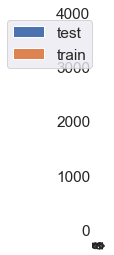

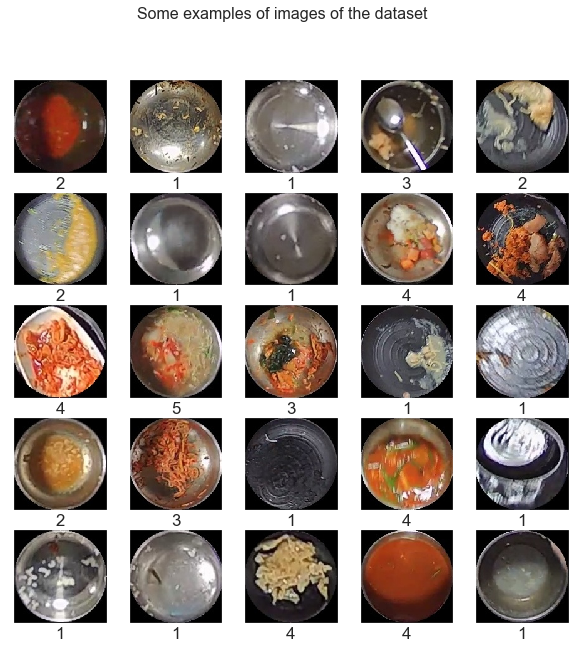

In [16]:
display_examples(class_names, train_images, train_labels)

In [17]:
def display_random_image(class_names, images, labels):
    index = np.random.randint(images.shape[0])
    plt.figure()
    plt.imshow(images[index])
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.title('Image #{} :'.format(index) + class_names[labels[index]])
    plt.show()

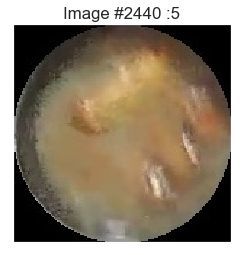

In [18]:
display_random_image(class_names, train_images, train_labels)

In [19]:
predictions = model.predict(test_images)
pred_labels = np.argmax(predictions, axis = 1)
display_random_image(class_names, test_images, pred_labels)

TypeError: only integer scalar arrays can be converted to a scalar index

In [ ]:
def print_mislabeled_images(class_name, test_images, test_labels, pred_labels):
    B00 = (test_labels == pred_labels)
    mislabeled_indices = np.where(B00 == 0)
    mislabeled_images = test_images[mislabeled_indices]
    mislabeled_labels = pred_labels[mislabeled_indices]
    title = "Some examples of mislabeled images by the classifier:"
    display_examples(class_names, mislabeled_images, mislabeled_labels)

In [ ]:
print_mislabeled_images(class_names, test_images, test_labels, pred_labels)

In [20]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input

model = VGG16(weights = 'imagenet', include_top=False, input_shape=(150,150,3))
model.trainable = False

In [21]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

In [22]:
train_features = model.predict(train_images)
test_features = model.predict(test_images)

In [23]:
n_train, x, y, z = train_features.shape
n_test, x, y, z = test_features.shape
numFeatures = x*y*z

In [24]:
print(train_features.shape)
#print(test_features)
print(n_train)
print(n_test)
print(numFeatures)
print(x)
print(y)
print(z)
print(train_images.shape)
print(train_labels.shape)

(12091, 4, 4, 512)
12091
4038
8192
4
4
512
(12091, 150, 150, 3)
(12091,)


In [25]:
model_1 = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape = (4,4,512)),
        tf.keras.layers.Dense(2048, activation=tf.nn.relu),
        tf.keras.layers.Dense(512, activation=tf.nn.relu),
        tf.keras.layers.Dense(256, activation=tf.nn.relu),
        tf.keras.layers.Dense(128, activation=tf.nn.relu),
        tf.keras.layers.Dense(64, activation=tf.nn.relu),
        tf.keras.layers.Dense(32, activation=tf.nn.relu),
        tf.keras.layers.Dense(5, activation=tf.nn.softmax)
    ])
model_1.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
history2 = model_1.fit(train_features, train_labels, batch_size = 64, epochs=30, validation_split = 0.1)

Train on 10881 samples, validate on 1210 samples
Epoch 1/30
10881/10881 [==============================] - 1s 135us/sample - loss: 1.1744 - acc: 0.5062 - val_loss: 0.9407 - val_acc: 0.5967
Epoch 2/30
10881/10881 [==============================] - 1s 111us/sample - loss: 0.8591 - acc: 0.6462 - val_loss: 0.9531 - val_acc: 0.5959
Epoch 3/30
10881/10881 [==============================] - 1s 122us/sample - loss: 0.6947 - acc: 0.7168 - val_loss: 1.0504 - val_acc: 0.5942
Epoch 4/30
10881/10881 [==============================] - 1s 113us/sample - loss: 0.6265 - acc: 0.7471 - val_loss: 1.1081 - val_acc: 0.6140
Epoch 5/30
10881/10881 [==============================] - 1s 116us/sample - loss: 0.6009 - acc: 0.7621 - val_loss: 0.8084 - val_acc: 0.6917
Epoch 6/30
10881/10881 [==============================] - 1s 120us/sample - loss: 0.4719 - acc: 0.8144 - val_loss: 0.9599 - val_acc: 0.6736
Epoch 7/30
10881/10881 [==============================] - 1s 123us/sample - loss: 0.3822 - acc: 0.8515 - val_lo

In [26]:
model_1.evaluate(test_features, test_labels)

4038/4038 [==============================] - 0s 57us/sample - loss: 0.8565 - acc: 0.7947


[0.8564633433534079, 0.7947003]

In [28]:
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 2048)              16779264  
_________________________________________________________________
dense_3 (Dense)              (None, 512)               1049088   
_________________________________________________________________
dense_4 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_5 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_6 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_7 (Dense)              (None, 32)               

In [29]:
from keras import models, layers
additional_model = models.Sequential()
additional_model.add(model)
additional_model.add(layers.Flatten())
additional_model.add(layers.Dense(2048, activation='relu'))
additional_model.add(layers.Dense(1024, activation='relu'))
additional_model.add(layers.Dense(512, activation='relu'))
additional_model.add(layers.Dense(256, activation='relu'))
additional_model.add(layers.Dense(128, activation='relu'))
additional_model.add(layers.Dense(64, activation='relu'))
additional_model.add(layers.Dense(32, activation='relu'))
additional_model.add(layers.Dense(5, activation='softmax'))
 
additional_model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
history2 = additional_model.fit(train_images, train_labels, batch_size = 64, epochs=30, validation_split = 0.1)


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 10881 samples, validate on 1210 samples
Epoch 1/30
10881/10881 [==============================] - 34s 3ms/step - loss: 1.2592 - acc: 0.4611 - val_loss: 1.0333 - val_acc: 0.5570
Epoch 2/30
10881/10881 [==============================] - 28s 3ms/step - loss: 0.9257 - acc: 0.6103 - val_loss: 1.3014 - val_acc: 0.4636
Epoch 3/30
10881/10881 [==============================] - 28s 3ms/step - loss: 0.7991 - acc: 0.6746 - val_loss: 1.0445 - val_acc: 0.5736
Epoch 4/30
10881/10881 [==============================] - 28s 3ms/step - loss: 0.7066 - acc: 0.7077 - val_loss: 0.7928 - val_acc: 0.6727
Epoch 5/30
10881/10881 [==============================] - 28s 3ms/step - loss: 0.5961 - acc: 0.7583 - val_loss: 1.2495 - val_acc: 0.5909
Epoch 6/30
10881/10881 [==============================] - 28s 3ms/step - loss: 0.5629 - acc: 0.7822 - val_loss: 0.7990 - val_acc: 0.7017
Epoch 7/30
10881/10881 [==========

In [33]:
#additional_model.save('model_80.11.h5')
additional_model.save('model_79.39.h5', save_format='h5')


TypeError: save() got an unexpected keyword argument 'save_format'

In [30]:
additional_model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 2048)              16779264  
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              2098176   
_________________________________________________________________
dense_3 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_4 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_5 (Dense)              (None, 128)               32896     
__________

In [31]:
additional_model.evaluate(test_images, test_labels)

4038/4038 [==============================] - 9s 2ms/step


[1.1083484273210147, 0.7939574046852921]

In [32]:
from keras.models import Model
inputs=model.inputs 
outputs=model.output
print(inputs)
print(outputs.shape)

[<tf.Tensor 'flatten_1_input:0' shape=(?, 4, 4, 512) dtype=float32>]
(?, 5)


In [26]:
np.random.seed(seed=1997) 
n_estimators = 5
max_samples = 0.8 
max_samples *= n_train 
max_samples = int(max_samples)

In [27]:
from keras.optimizers import adam
models = list()
random = np.random.randint(500, 800, size = n_estimators)
from tensorflow.keras.optimizers import RMSprop

opt = RMSprop(lr=0.0001, decay=1e-6)
#tf.keras.layers.Dense(random[i], activation=tf.nn.relu)
for i in range(n_estimators):
    model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape = (x,y,z)),
                                tf.keras.layers.Dense(2048, activation=tf.nn.relu),                                
                                tf.keras.layers.Dense(1024, activation=tf.nn.relu),
                                tf.keras.layers.Dense(512, activation=tf.nn.relu),
                                tf.keras.layers.Dense(256, activation=tf.nn.relu),
                                tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                tf.keras.layers.Dense(5, activation=tf.nn.softmax)])
    model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

    models.append(model)
from tensorflow.python.keras.callbacks import TensorBoard, EarlyStopping
from tensorflow.python.keras.callbacks import TensorBoard, ModelCheckpoint


early_stop = EarlyStopping(monitor='val_loss', min_delta=0, patience=1000, verbose=0, mode='auto')

model_saver = ModelCheckpoint(filepath='./models', verbose=0, period=2)

In [28]:
histories = []
for i in range(n_estimators):
    train_idx = np.random.choice(len(train_features), size=max_samples)
    histories.append(models[i].fit(train_features[train_idx], train_labels[train_idx], batch_size=64, epochs=30, 
                                   validation_split=0.1))

Train on 8704 samples, validate on 968 samples
Epoch 1/30
8704/8704 [==============================] - 1s 139us/sample - loss: 1.2238 - acc: 0.5072 - val_loss: 1.1299 - val_acc: 0.5558
Epoch 2/30
8704/8704 [==============================] - 1s 117us/sample - loss: 0.7770 - acc: 0.6824 - val_loss: 0.7550 - val_acc: 0.7273
Epoch 3/30
8704/8704 [==============================] - 1s 117us/sample - loss: 0.6057 - acc: 0.7586 - val_loss: 0.6707 - val_acc: 0.7490
Epoch 4/30
8704/8704 [==============================] - 1s 116us/sample - loss: 0.4605 - acc: 0.8263 - val_loss: 0.7203 - val_acc: 0.7438
Epoch 5/30
8704/8704 [==============================] - 1s 123us/sample - loss: 0.3680 - acc: 0.8599 - val_loss: 0.5992 - val_acc: 0.8068
Epoch 6/30
8704/8704 [==============================] - 1s 122us/sample - loss: 0.3028 - acc: 0.8884 - val_loss: 0.6122 - val_acc: 0.7996
Epoch 7/30
8704/8704 [==============================] - 1s 121us/sample - loss: 0.2343 - acc: 0.9164 - val_loss: 0.6841 - val

In [29]:
predictions = []
for i in range(n_estimators):
    predictions.append(models[i].predict(test_features))
    
predictions = np.array(predictions)
predictions = predictions.sum(axis = 0)
pred_labels = predictions.argmax(axis= 1)

In [30]:
from sklearn.metrics import accuracy_score
print("Accuracy : {}".format(accuracy_score(test_labels, pred_labels)))

Accuracy : 0.7828132738979693


In [31]:
ModelCheckpoint(filepath='./models', verbose=0, period=2)